In [25]:
from pathlib import Path

import matplotlib
import seaborn as sn

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
matplotlib.pyplot.rcParams['savefig.facecolor'] = 'white'
sn.set_context("poster")

In [26]:
zinc_dgl = Path.home() / ".dgl" / "jtvae" / "train.txt"
lincs_trapnell = Path.cwd().parent / "lincs_trapnell.smiles"
outfile = Path.cwd().parent / "lincs_trapnell.smiles.short"
assert zinc_dgl.exists() and lincs_trapnell.exists()

In [27]:
for p in [zinc_dgl, lincs_trapnell]:
    with open(p) as f:
        max_length = 0
        for smile in f:
            if len(smile.strip()) > max_length:
                max_length = len(smile.strip())
print(f"Max length of {p} is {max_length}")

Max length of /home/simon/.dgl/jtvae/train.txt is 120
Max length of /home/simon/Documents/ETH/Masters_thesis/chemical_CPA/embeddings/lincs_trapnell.smiles is 461


In [33]:
with open(lincs_trapnell) as f:
    count = 0
    for smile in f:
        smile = smile.strip()
        if len(smile) >= 200:
            count += 1
print(f"There are {count} SMILES >= 200")

There are 36 SMILES >= 200


In [29]:
with open(lincs_trapnell) as f:
    h = []
    for smile in f:
        h.append(len(smile.strip()))

Text(0.5, 1.0, 'SMILES-length in LINCS')

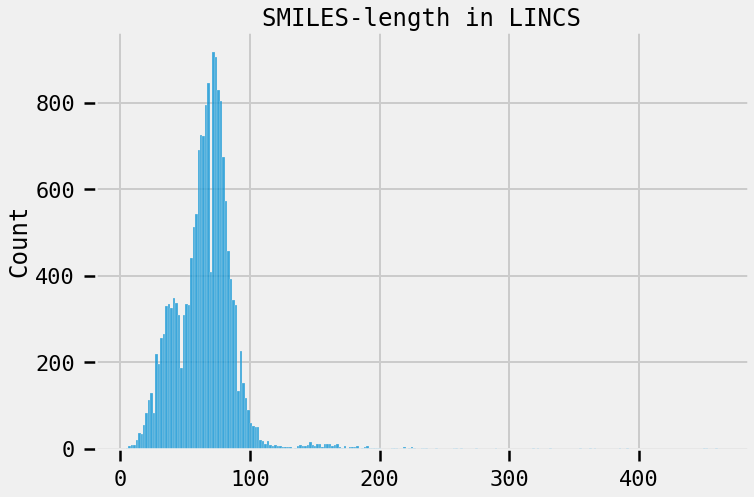

In [30]:
ax = sn.histplot(h)
ax.set_title("SMILES-length in LINCS")

## Generate a new smiles list
We generate a new list of SMILES that are pruned to length <= 200

In [31]:
with open(outfile, "w") as outfile, open(lincs_trapnell) as infile:
    for line in infile:
        line = line.strip()
        if len(line) < 200:
            outfile.write(line + "\n")

In [34]:
with open(Path.cwd().parent / "lincs_trapnell.smiles.mini", "w") as outfile, open(lincs_trapnell) as infile:
    for line in infile:
        line = line.strip()
        if len(line) <= 120:
            outfile.write(line + "\n")